In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

yeong=pd.read_csv("[NHISS] imputation_v1.csv")
thousand=pd.read_csv("HE_data_v2.csv")




yeong=yeong.drop(yeong.columns[0],axis=1)
yeong=yeong.drop(['RN_INDI','HME_YYYYMM' ,'Type'],axis=1)

thousand=thousand.drop(thousand.columns[0],axis=1)
thousand=thousand.drop(['ID','year'],axis=1)
thousand=thousand[thousand['age']>=20]
# fit_data=fit_data.drop([fit_data.columns[0],fit_data.columns[1]],axis=1)
# yeong




In [97]:
yeong_features=yeong.drop(['Age'],axis=1)
yeong_targets=yeong['Age']

thousand_features=thousand.drop(['age','age_group'],axis=1)
thousand_targets=thousand['age']

thousand_features.columns

Index(['sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_sbp', 'HE_dbp',
       'HE_Upro', 'HE_HB', 'HE_glu', 'HE_chol', 'HE_TG', 'HE_HDL_st2',
       'HE_crea', 'HE_ast', 'HE_alt', 'LDL_est_S'],
      dtype='object')

In [87]:
yeong_features.columns

Index(['SEX', 'G1E_HGHT', 'G1E_WGHT', 'G1E_WSTC', 'G1E_BMI', 'G1E_VA_LT',
       'G1E_VA_RT', 'G1E_HA_LT', 'G1E_HA_RT', 'G1E_BP_SYS', 'G1E_BP_DIA',
       'G1E_URN_PROT', 'G1E_HGB', 'G1E_FBS', 'G1E_TOT_CHOL', 'G1E_TG',
       'G1E_HDL', 'G1E_LDL', 'G1E_CRTN', 'G1E_SGOT', 'G1E_SGPT', 'G1E_GGT',
       'G1E_GFR'],
      dtype='object')

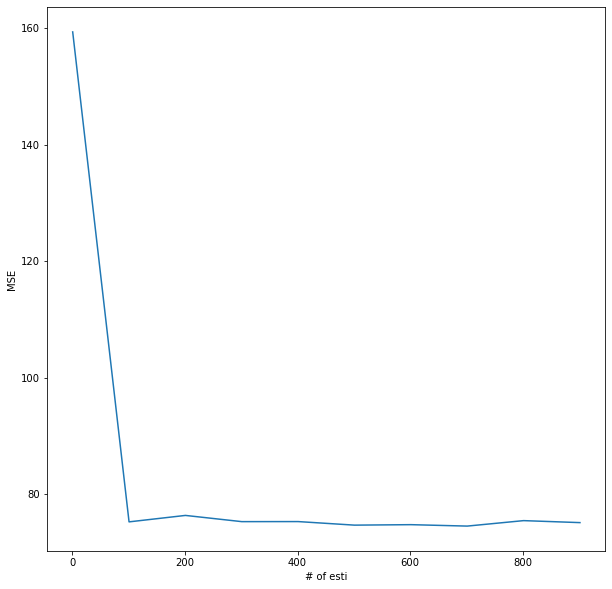

In [129]:
from sklearn.metrics import r2_score


sc=MinMaxScaler()

yeong_features_minmax=sc.fit_transform(yeong_features)
yeong_features_minmax=pd.DataFrame(yeong_features_minmax,columns=['SEX', 'G1E_HGHT', 'G1E_WGHT', 'G1E_WSTC', 'G1E_BMI', 'G1E_VA_LT',
       'G1E_VA_RT', 'G1E_HA_LT', 'G1E_HA_RT', 'G1E_BP_SYS', 'G1E_BP_DIA',
       'G1E_URN_PROT', 'G1E_HGB', 'G1E_FBS', 'G1E_TOT_CHOL', 'G1E_TG',
       'G1E_HDL', 'G1E_LDL', 'G1E_CRTN', 'G1E_SGOT', 'G1E_SGPT', 'G1E_GGT',
       'G1E_GFR'])
x_train, x_test, y_train, y_test = train_test_split(yeong_features_minmax,yeong_targets,test_size=0.2, random_state=42)
mseOos=[]
R_list=[]
ntrees=range(1,1000,100)
for i in ntrees:

    yeong_model=RandomForestRegressor(n_estimators=i,max_depth=10,criterion='mse',n_jobs=-1,max_leaf_nodes=1024)
    yeong_model.fit(x_train,y_train)
    prediction=yeong_model.predict(x_test)
    mseOos.append(mean_squared_error(y_test, prediction))
    R_list.append(r2_score(y_test, prediction))

plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel("# of esti")
plt.ylabel("MSE")
plt.plot(ntrees,mseOos)


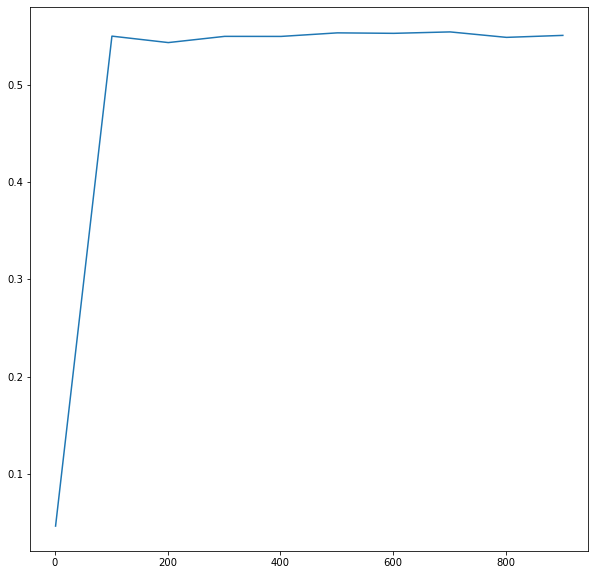

In [130]:
plt.plot(ntrees,R_list)

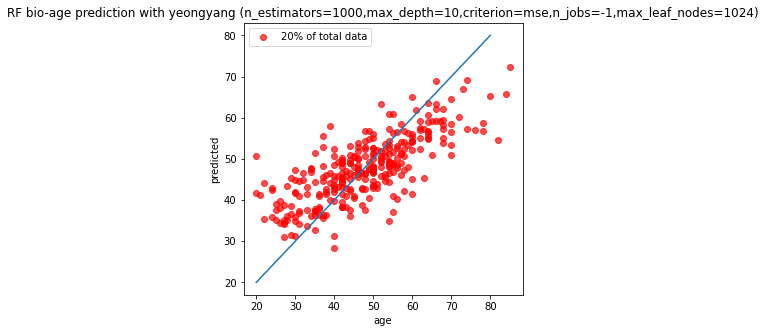

In [127]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.title("RF bio-age prediction with yeongyang (n_estimators=1000,max_depth=10,criterion=mse,n_jobs=-1,max_leaf_nodes=1024)")
plt.xlabel("age")
plt.ylabel("predicted")
plt.scatter(y_test,yeong_model.predict(x_test),label='20% of total data',color='r',alpha=.7)
plt.plot([20,80],[20,80])
plt.legend()
plt.show()

In [128]:


r2_score(y_test,yeong_model.predict(x_test))

0.5508965892436977

In [98]:
# thousand_model=RandomForestRegressor(n_estimators=100,max_depth=20,criterion='mse',n_jobs=1,max_leaf_nodes=2048)
sc=MinMaxScaler()

thousand_features_minmax=sc.fit_transform(thousand_features)
thousand_features_minmax=pd.DataFrame(thousand_features_minmax,columns=['sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_sbp', 'HE_dbp',
       'HE_Upro', 'HE_HB', 'HE_glu', 'HE_chol', 'HE_TG', 'HE_HDL_st2',
       'HE_crea', 'HE_ast', 'HE_alt', 'LDL_est_S'])
x_train, x_test, y_train, y_test = train_test_split(thousand_features_minmax,thousand_targets,test_size=0.1, random_state=42)



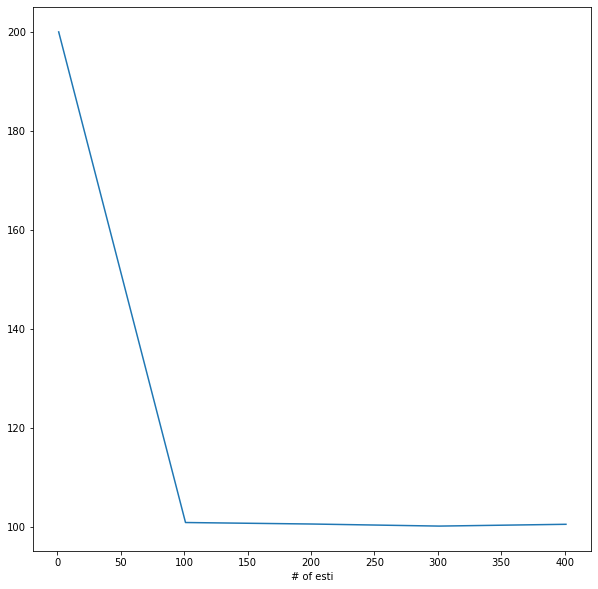

In [123]:
mseOos=[]
R_list=[]
ntrees=range(1,500,100)
from sklearn.metrics import r2_score


for i in ntrees:

    thousand_model=RandomForestRegressor(n_estimators=i,max_depth=100,criterion='mse',n_jobs=-1,max_leaf_nodes=1024)
    thousand_model.fit(x_train,y_train)
    prediction=thousand_model.predict(x_test)
    mseOos.append(mean_squared_error(y_test, prediction))
    R_list.append(r2_score(y_test,thousand_model.predict(x_test)))
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel("# of esti")
# plt.ylabel("MSE")
plt.plot(ntrees,mseOos)
# plt.plot(ntrees,R_list)

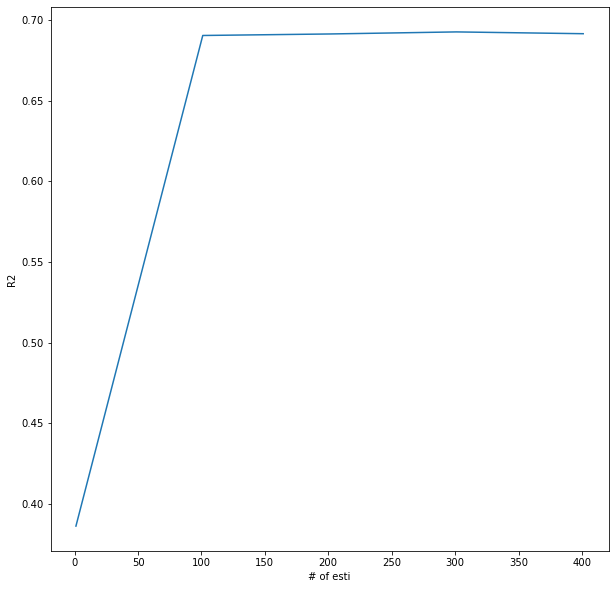

In [124]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.xlabel("# of esti")
plt.ylabel("R2")
plt.plot(ntrees,R_list)

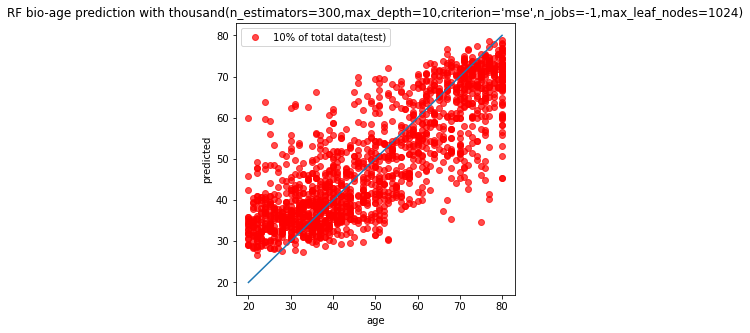

In [125]:
thousand_model=RandomForestRegressor(n_estimators=300,max_depth=10,criterion='mse',n_jobs=-1,max_leaf_nodes=1024)
thousand_model.fit(x_train,y_train)
    
plt.rcParams["figure.figsize"] = (5, 5)
plt.title("RF bio-age prediction with thousand(n_estimators=300,max_depth=10,criterion='mse',n_jobs=-1,max_leaf_nodes=1024)")
plt.xlabel("age")
plt.ylabel("predicted")
plt.scatter(y_test,thousand_model.predict(x_test),label='10% of total data(test)',color='r',alpha=.7)
# plt.scatter(y_train,thousand_model.predict(x_train),label='10% of total data',color='g',alpha=.2)
plt.plot([20,80],[20,80])
plt.legend()
plt.show()

0.689201804200666